# 4.10 Errata

## Instacart Grocery Basket Analysis

#### -Errol Hinkamp

##### Table of Contents

1. Import libraries and data
2. Product price range visualizations
3. Department sales visualization
4. Loyalty status visualizations

# 1. Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import dataframe
path=r'C:\Users\Errol\Documents\Data Analyst Work\Achievement 4\Instacart Basket Analysis'
bigmerged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'bigmerged_4.10.trimmed.pkl'))

In [3]:
# Disable row limits
pd.options.display.max_rows = None

In [4]:
# Disable column limits
pd.options.display.max_columns = None

In [5]:
# Quick visual check of data
bigmerged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,activity_flag
10,265153,11282,1,4,11,NaN,196,3,0,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity
11,1466390,11282,3,5,13,5.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity
12,1305203,11282,4,4,16,13.0,196,4,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity
13,2134557,11282,5,0,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Busiest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity
14,3371763,11282,8,4,17,24.0,196,2,1,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity


In [6]:
# Check shape
bigmerged.shape

(30959687, 28)

# 2. Product price range visualizations

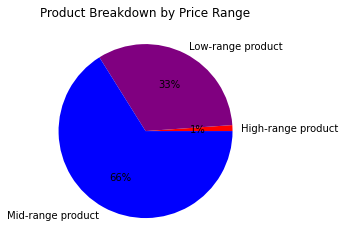

In [7]:
# Make pie chart of product price ranges
price_ranges_pie=bigmerged.groupby('price_range_loc')['product_id'].nunique().plot.pie(ylabel='', title='Product Breakdown by Price Range', autopct='%1.0f%%', colors=['red','purple','blue'])

In [8]:
# Export chart
price_ranges_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_ranges_pie.png'))

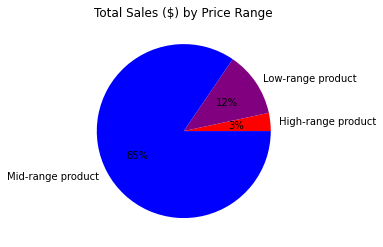

In [9]:
# Create & save pie chart of total sales by price range
price_ranges_sales_pie=bigmerged.groupby('price_range_loc')['prices'].sum().plot.pie(ylabel='', title='Total Sales ($) by Price Range', autopct='%1.0f%%', colors=['red','purple','blue'])

In [10]:
# Export chart
price_ranges_sales_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_ranges_salespie.png'))

# 3. Department sales visualization

In [11]:
# Add "department name" column
bigmerged.loc[bigmerged['department_id'] == 1, 'department_name'] = 'frozen'
bigmerged.loc[bigmerged['department_id'] == 2, 'department_name'] = 'other'
bigmerged.loc[bigmerged['department_id'] == 3, 'department_name'] = 'bakery'
bigmerged.loc[bigmerged['department_id'] == 4, 'department_name'] = 'produce'
bigmerged.loc[bigmerged['department_id'] == 5, 'department_name'] = 'alcohol'
bigmerged.loc[bigmerged['department_id'] == 6, 'department_name'] = 'international'
bigmerged.loc[bigmerged['department_id'] == 7, 'department_name'] = 'beverages'
bigmerged.loc[bigmerged['department_id'] == 8, 'department_name'] = 'pets'
bigmerged.loc[bigmerged['department_id'] == 9, 'department_name'] = 'dry goods pasta'
bigmerged.loc[bigmerged['department_id'] == 10, 'department_name'] = 'bulk'
bigmerged.loc[bigmerged['department_id'] == 11, 'department_name'] = 'personal care'
bigmerged.loc[bigmerged['department_id'] == 12, 'department_name'] = 'meat seafood'
bigmerged.loc[bigmerged['department_id'] == 13, 'department_name'] = 'pantry'
bigmerged.loc[bigmerged['department_id'] == 14, 'department_name'] = 'breakfast'
bigmerged.loc[bigmerged['department_id'] == 15, 'department_name'] = 'canned goods'
bigmerged.loc[bigmerged['department_id'] == 16, 'department_name'] = 'dairy eggs'
bigmerged.loc[bigmerged['department_id'] == 17, 'department_name'] = 'household'
bigmerged.loc[bigmerged['department_id'] == 18, 'department_name'] = 'babies'
bigmerged.loc[bigmerged['department_id'] == 19, 'department_name'] = 'snacks'
bigmerged.loc[bigmerged['department_id'] == 20, 'department_name'] = 'deli'
bigmerged.loc[bigmerged['department_id'] == 21, 'department_name'] = 'missing'

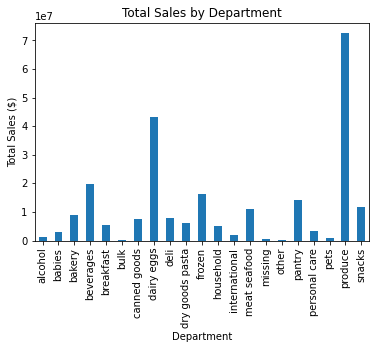

In [12]:
# Generate visualization
sales_department_bar=bigmerged.groupby('department_name')['prices'].sum().plot.bar(xlabel='Department', ylabel='Total Sales ($)', title='Total Sales by Department')

In [13]:
# Export chart
sales_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sales_department_bar.png'))

# 4. Loyalty status visualizations

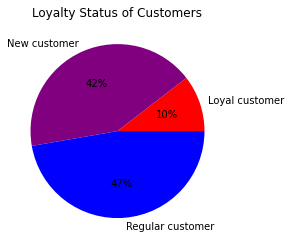

In [14]:
# Make pie chart of loyalty flags
loyalty_pie=bigmerged.groupby('loyalty_flag')['user_id'].nunique().plot.pie(ylabel='', title='Loyalty Status of Customers', autopct='%1.0f%%', colors=['red','purple','blue'])

In [15]:
# Export chart
loyalty_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_pie.png'))

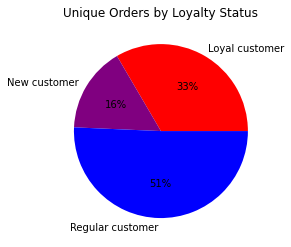

In [16]:
# Make pie chart of unique orders by loyalty flag
loyalty_orders_pie=bigmerged.groupby('loyalty_flag')['order_id'].nunique().plot.pie(ylabel='', title='Unique Orders by Loyalty Status', autopct='%1.0f%%', colors=['red','purple','blue'])

In [17]:
# Export chart
loyalty_orders_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_orders_pie.png'))